In [82]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [83]:
# Visualizar las primeras filas del dataset
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
# Eliminar columnas irrelevantes o con datos faltantes
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [85]:
# Manejar datos faltantes (en este caso, rellenar los valores faltantes con la media)
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1, 1))

In [86]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [87]:
# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop('Survived', axis=1)
y = data['Survived']
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
random_state=42)
# Crear el modelo de clasificación (Regresión Logística)
model = LogisticRegression(max_iter=165)

In [88]:
# Entrenar el modelo
model.fit(X_train, y_train)

c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=165)

In [89]:
# Realizar predicciones
predictions = model.predict(X_test)

In [90]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

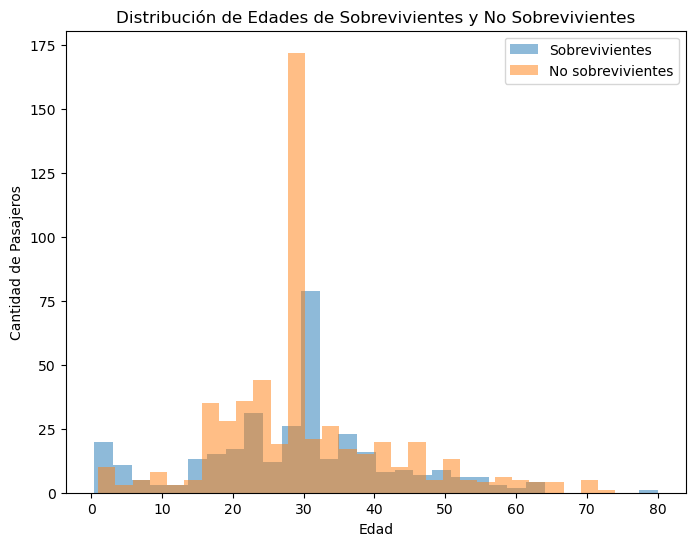

In [64]:
# Visualización: Histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(data[data['Survived'] == 1]['Age'], bins=30, alpha=0.5, 
label='Sobrevivientes')
plt.hist(data[data['Survived'] == 0]['Age'], bins=30, alpha=0.5, 
label='No sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Edades de Sobrevivientes y No Sobrevivientes')
plt.legend()
plt.show()

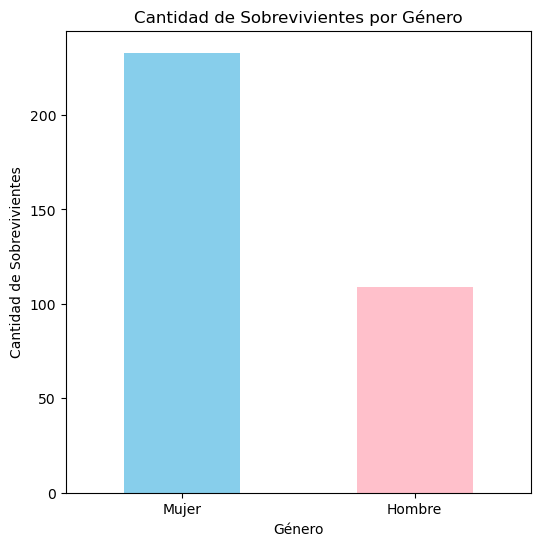

In [65]:
# Visualización: Gráfico de barras de la cantidad de sobrevivientes por género
survived_gender = data.groupby('Sex_male')['Survived'].sum()
plt.figure(figsize=(6, 6))
survived_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.xticks([0, 1], ['Mujer', 'Hombre'], rotation=0)
plt.xlabel('Género')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Género')
plt.show()

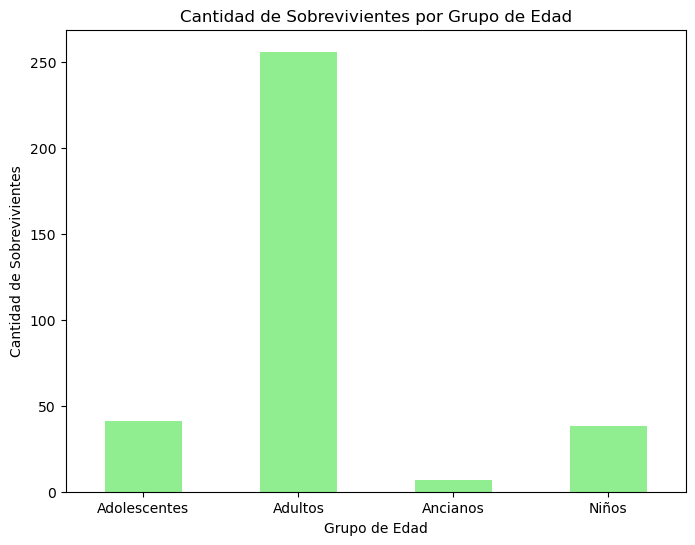

In [67]:
# Clasificar a las personas en grupos de edad
def clasificar_edad(edad):
    if edad > 0 and edad < 10:
        return 'Niños'
    elif edad < 20:
        return 'Adolescentes'
    elif edad < 60:
        return 'Adultos'
    else:
        return 'Ancianos'

data['GrupoEdad'] = data['Age'].apply(clasificar_edad)

# Contar el número de sobrevivientes en cada grupo de edad
sobrevivientes_grupo_edad = data[data['Survived'] == 1].groupby('GrupoEdad').size()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sobrevivientes_grupo_edad.plot(kind='bar', color='lightgreen')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Grupo de Edad')
plt.xticks(rotation=0)
plt.show()

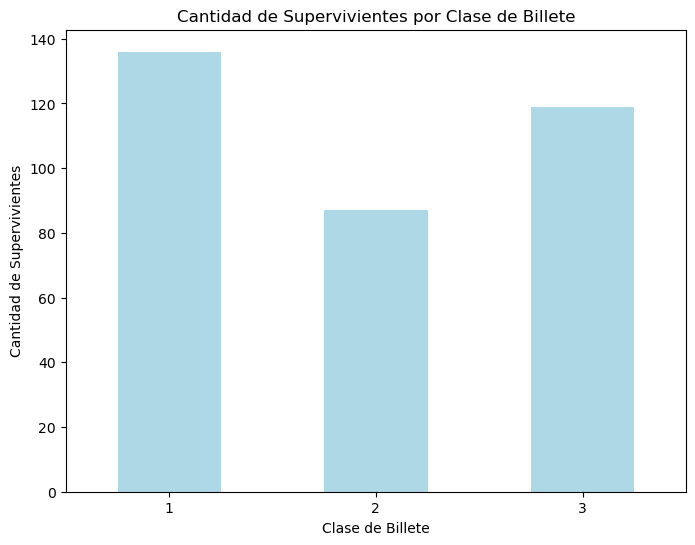

In [68]:
# Agrupar los datos por clase de billete y contar el número de supervivientes
survived_pclass = data.groupby('Pclass')['Survived'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
survived_pclass.plot(kind='bar', color='lightblue')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de Supervivientes')
plt.title('Cantidad de Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

In [69]:
df = data.groupby('Pclass')

In [70]:
df['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


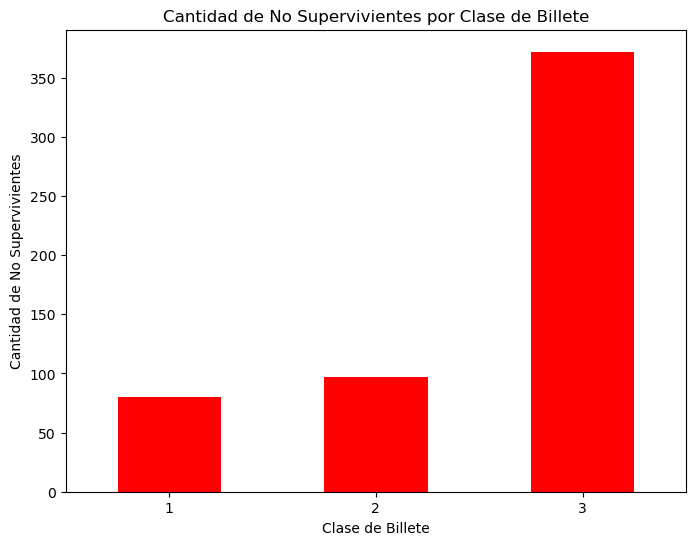

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


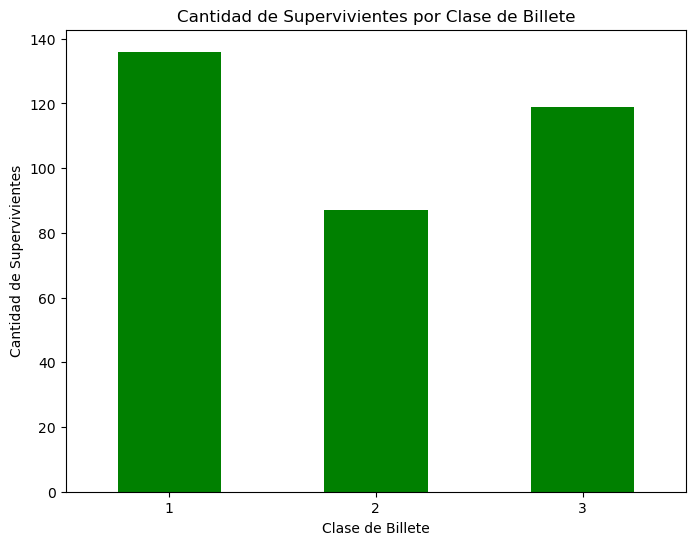

In [71]:
# Agrupar los datos por clase de billete y contar el número de no supervivientes
no_survived_pclass = data[data['Survived'] == 0].groupby('Pclass')['Survived'].count()
print(no_survived_pclass)

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
no_survived_pclass.plot(kind='bar', color='red')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de No Supervivientes')
plt.title('Cantidad de No Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

# Agrupar los datos por clase de billete y contar el número de supervivientes
survived_pclass = data[data['Survived'] == 1].groupby('Pclass')['Survived'].count()
print(survived_pclass)

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
survived_pclass.plot(kind='bar', color='green')
plt.xlabel('Clase de Billete')
plt.ylabel('Cantidad de Supervivientes')
plt.title('Cantidad de Supervivientes por Clase de Billete')
plt.xticks(rotation=0)
plt.show()

Matriz de Confusión:
[[97  8]
 [55 19]]


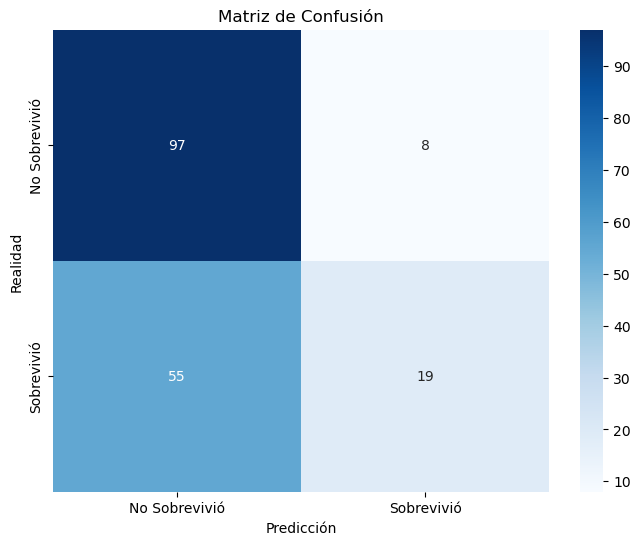

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

print('Matriz de Confusión:')
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [91]:

# Imprimir la precisión del modelo y el informe de clasificación
print(f'Precisión del modelo: {accuracy}')
print('Informe de clasificación:')
print(report)

Precisión del modelo: 0.8555555555555555
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.79      0.86      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

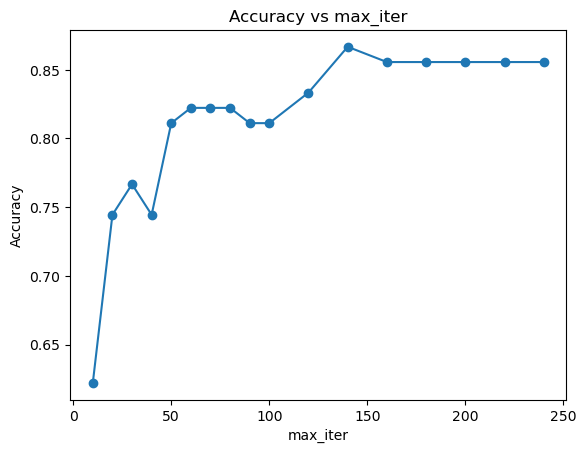

In [92]:
def prueba_max_iters():

    max_iters = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240]

    accuracy_scores = []

    for max_iter in max_iters:
        model = LogisticRegression(max_iter=max_iter)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_scores.append(accuracy)
    
    plt.plot(max_iters, accuracy_scores, 'o-')
    plt.xlabel('max_iter')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs max_iter')

    plt.show()

prueba_max_iters()

c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

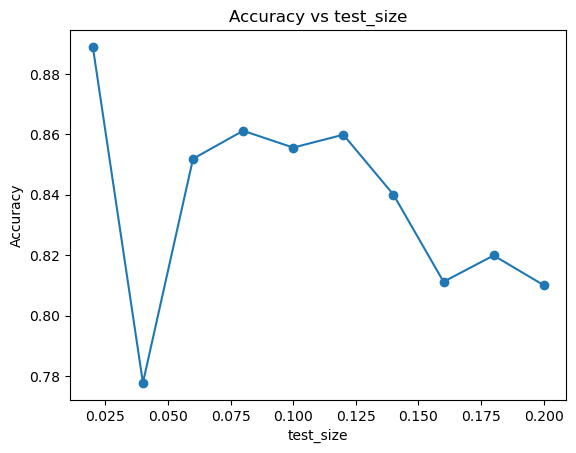

In [93]:
def prueba_test_size():
    
    test_sizes = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]

    accuracy_scores = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model = LogisticRegression(max_iter=160)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_scores.append(accuracy)
    
    plt.plot(test_sizes, accuracy_scores, 'o-')
    plt.xlabel('test_size')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs test_size')

    plt.show()

prueba_test_size()